

# RFM ANALYSIS



*Business Problem:*

A COMPANY wants to divide its customers into segments and determine marketing strategies according to these segments. To this end, customer behaviors will be defined and groups will be created according to these behavior clusters.

*The Data Set Story*
**
The dataset consists of information obtained from the past shopping behavior of customers who made their last purchases as OmniChannel (both online and offline shopping) between 2009-2010 and 2010-2011.

**Features in the Dataset*

1. InvoiceNo: Invoice number.
2. Unique number for each transaction, i.e. invoice. If it starts with C, the canceled transaction.
3. StockCode: Product code. Unique number for each product.
4. Description:
5. Product name.
6. Quantity: This is the quantity of the product. It expresses how many of the products in the invoices were sold.
7. InvoiceDate: Invoice date and time.
8. UnitPrice: Product price (in pounds sterling).
9. CustomerID: Unique customer number.
10. Country: Country name. The country where the customer lives.


In [1]:
# Import Libraries
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Adjusting Row Column Settings

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
df = pd.read_excel("/kaggle/input/rfm-analysis/online_retail_II.xlsx")


# Loading the Data Set

In [4]:
df.shape

(525461, 8)

# Explanatory Data Analysis-EDA

In [5]:
def check_df(dataframe, head=10):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Columns #####################")
    print(dataframe.columns)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df)

##################### Shape #####################
(525461, 8)
##################### Columns #####################
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC 

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [8]:
df.shape

(525461, 8)

In [9]:
df = df[(df['Quantity'] > 0)]

In [10]:
df.dropna(inplace=True)

In [11]:
df = df[df["Invoice"].astype(str).str.contains("C")==False]

# Calculating RFM Metrics (Recency, Frequency, Monetary)

In [12]:
# Present Date (date of analysis)
today_date = dt.datetime(2011, 12, 11)

# Key Metrics Mapping

*InvoiceDate => 
RecencyInvoice => 
FrequencyTotalPrice => 
Monetary*
****

In [13]:
# Creation of TotalPrice
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [15]:
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [16]:
today_date

datetime.datetime(2011, 12, 11, 0, 0)

In [17]:
# Calculating RFM Metrics
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [18]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,530,11,372.86
12347.00,368,2,1323.32
12348.00,439,1,222.16
12349.00,408,3,2671.14
12351.00,376,1,300.93


In [19]:
# Changing column names
rfm.columns = ['recency', 'frequency', 'monetary']

In [20]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.00,530,11,372.86
12347.00,368,2,1323.32
12348.00,439,1,222.16
12349.00,408,3,2671.14
12351.00,376,1,300.93


In [21]:
# Avoiding negative values due to refunds
rfm = rfm[rfm["monetary"] > 0]

# Calculating RFM Scores (Recency_Score, Frequency_Score, Monetary_Score)

In [22]:
# Calculating Recency_Score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

In [23]:
rfm.head()

,recency,frequency,monetary,recency_score
Customer ID,,,,
12346.00,530,11,372.86,2
12347.00,368,2,1323.32,5
12348.00,439,1,222.16,2
12349.00,408,3,2671.14,3
12351.00,376,1,300.93,5


In [24]:
# Calculating Frequency_Score
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [25]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
Customer ID,,,,,
12346.00,530,11,372.86,2,5
12347.00,368,2,1323.32,5,2
12348.00,439,1,222.16,2,1
12349.00,408,3,2671.14,3,3
12351.00,376,1,300.93,5,1


In [26]:
# Calculating Monetary_Score
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [27]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.00,530,11,372.86,2,5,2
12347.00,368,2,1323.32,5,2,4
12348.00,439,1,222.16,2,1,1
12349.00,408,3,2671.14,3,3,5
12351.00,376,1,300.93,5,1,2


In [28]:
# Creating RFM_SSCORE VARIABLE
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [29]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.00,530,11,372.86,2,5,2,25
12347.00,368,2,1323.32,5,2,4,52
12348.00,439,1,222.16,2,1,1,21
12349.00,408,3,2671.14,3,3,5,33
12351.00,376,1,300.93,5,1,2,51


# Creating & Analysing RFM Segments

# **RFM Segments

Champions: The best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can be the first to buy new products.

Potential Loyalists: The recent customers with average frequency and who spent a good amount. You can make them your Loyalists or Champions by offering membership or loyalty programs or recommending related products.

New Customers: Customers who have a high overall RFM score but are not frequent shoppers. Special offers can be provided to increase their visits.

At Risk Customers: Customers who purchased often and spent big amounts, but haven’t purchased recently. Personalized deals and product/service recommendations can help reactivate them.

Can’t Lose Them: Customers who used to visit and purchase quite often, but haven’t been visiting recently. Get them to revisit with relevant promotions and conduct surveys to find out what went wrong.**

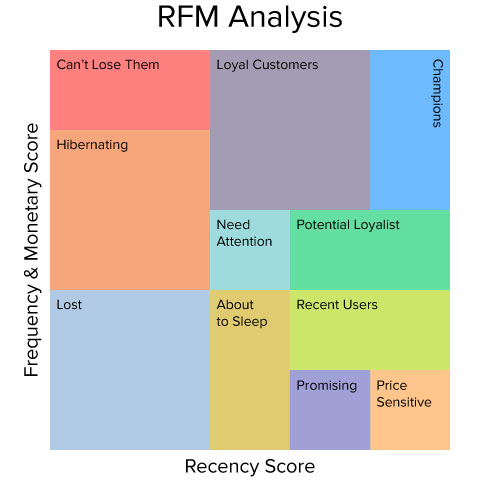]

In [30]:
# Creation of a segment map
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

[<iframe src="https://www.kaggle.com/embed/mehmetisik/rfm-analysis-1?cellIds=51&kernelSessionId=220118352" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="RFM Analysis - 1"></iframe>](http://)

In [31]:
# creating segment variable
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [32]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.00,530,11,372.86,2,5,2,25,cant_loose
12347.00,368,2,1323.32,5,2,4,52,potential_loyalists
12348.00,439,1,222.16,2,1,1,21,hibernating
12349.00,408,3,2671.14,3,3,5,33,need_attention
12351.00,376,1,300.93,5,1,2,51,new_customers


In [33]:
rfm.shape

(4312, 8)

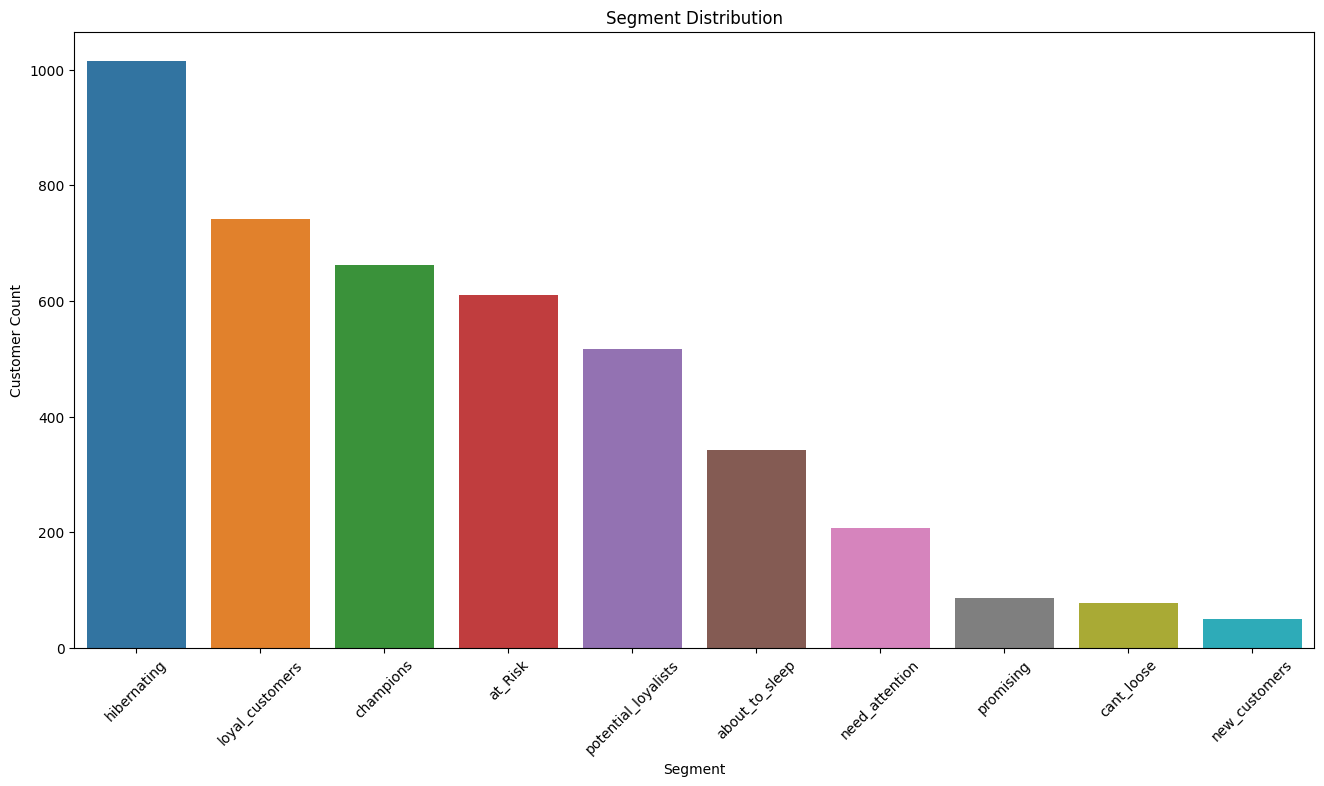

In [34]:
# Segment Distribution
segment_counts = rfm['segment'].value_counts()
plt.figure(figsize=(16, 8))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()